In [1]:
import pandas
import datetime
import numpy
from scipy.optimize import curve_fit
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import ticker
%matplotlib inline

In [2]:
def saps_pred_func(x, y, dst):    
    (a_sx, b_sx, a_sy, b_sy, a_xo, b_xo, a_yo, b_yo, a_o, b_o, theta) = \
        ( 3.11, 3.71e-03, 1.72,\
             8.19e-04, 4.59, 6.33e-02, -1.19, 3.21e-02,
             8.93e-01, -1.47e-03, 6.92e-01)
#         ( 3.04, 2.98e-03, 1.69,\
#          -8.53e-04, 4.61, 6.36e-02, -1.28, 3.1e-02,
#          8.49e-01, -1.57e-03, 6.69e-01)        
    sigma_x = a_sx + b_sx * dst
    sigma_y = a_sy + b_sy * dst
    xo = a_xo + b_xo * dst
    yo = a_yo + b_yo * dst
    amplitude = a_o + b_o * dst    
    
    a = (numpy.cos(theta)**2)/(2*sigma_x**2) + (numpy.sin(theta)**2)/(2*sigma_y**2)
    b = -(numpy.sin(2*theta))/(4*sigma_x**2) + (numpy.sin(2*theta))/(4*sigma_y**2)
    c = (numpy.sin(theta)**2)/(2*sigma_x**2) + (numpy.cos(theta)**2)/(2*sigma_y**2)
    g = amplitude*numpy.exp( - (a*((x-xo)**2) + 2*b*(x-xo)*(y-yo) 
                            + c*((y-yo)**2)))
    return g

In [3]:
sapsPredDF = pandas.DataFrame(columns=["normMLT", "normLAT", "probSAPS", "MLT", "Lat", "dst_index"])
latArr = []
mltArr = []
normLatArr = []
normMltArr = []
probSapsArr = []
dstValArr = []
dstBinArr = []

dstVal = -100

for x in range(50, 65):
    for y in range(-10,5):
        currNormLat =  x - 57.5
        normLatArr.append( currNormLat )
        normMltArr.append( y )
        if y > 0:
            mltArr.append( y )
        else:
            mltArr.append( y + 24 )
        latArr.append( x )
        probSapsArr.append( saps_pred_func(currNormLat,y,dstVal) )
        dstValArr.append(dstVal)
        
sapsPredDF["MLT"] = mltArr
sapsPredDF["Lat"] = latArr
sapsPredDF["normMLT"] = normMltArr
sapsPredDF["normLAT"] = normLatArr
sapsPredDF["probSAPS"] = probSapsArr
sapsPredDF["dst_index"] = dstValArr

sapsPredDF.head()

,normMLT,normLAT,probSAPS,MLT,Lat,dst_index
0,-10,-7.5,0.000007,14,50,-100
1,-9,-7.5,0.000055,15,50,-100
2,-8,-7.5,0.000332,16,50,-100
3,-7,-7.5,0.001534,17,50,-100
4,-6,-7.5,0.005381,18,50,-100


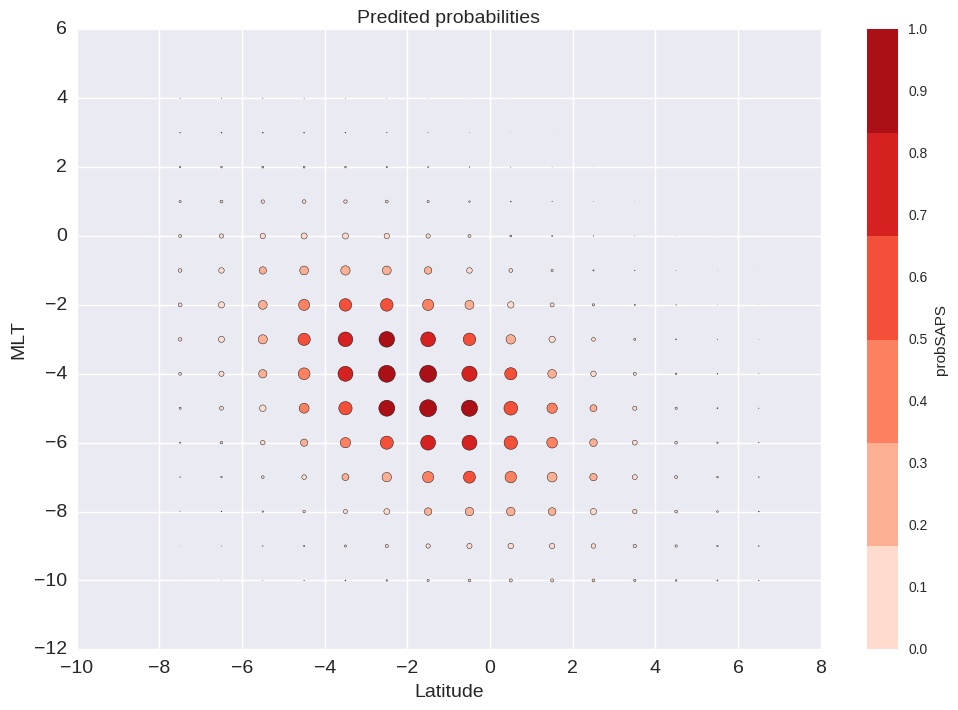

In [4]:
# Make a comparison plot of the data
# the model, actual values and error
# Set up the matplotlib figure
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1,1,1)
seaMap = ListedColormap(sns.color_palette("Reds"))
sapsPredDF.plot( kind='scatter',
              x='normLAT',
              y='normMLT',
              c='probSAPS',
              s=sapsPredDF["probSAPS"]*150, cmap=seaMap, vmin=0, vmax=1, ax=ax1)
ax1.set_ylabel("MLT", fontsize=14)
ax1.set_xlabel("Latitude", fontsize=14)
ax1.set_title( "Predited probabilities", fontsize=14 )
ax1.tick_params(axis='both', which='major', labelsize=14)
plt.savefig("../figs/testmod-new.pdf",bbox_inches='tight')